## Project Name - Uber Supply demand Gap Analysis

## Project Type - EDA
##### Contribution - Individual
##### Name - Hema Mukundan

## Project Summary
Overview:
Analyzed Uber ride request data to identify patterns in trip statuses, detect supply-demand mismatches, and generate actionable business insights. This end-to-end project involved data cleaning, KPI calculation, exploratory data analysis (EDA), and dashboard creation using Excel, SQL, and Python (Pandas, Matplotlib, Seaborn).

### Problem Statement
Uber, a leading ride-sharing platform, faces significant service disruptions during certain hours of the day due to a mismatch between rider demand and driver availability. These supply-demand gaps result in high cancellation rates and unfulfilled requests, particularly during peak hours and in specific pickup locations. This leads to poor customer experience, potential revenue loss, and reduced driver utilization.There is a need to analyze ride request data to uncover patterns in demand, trip completion, and cancellations to support data-driven decision-making for better resource allocation.

### Business Objective
To analyze Uber's trip request data and identify:

1. Peak demand hours and zones with high supply-demand mismatch.
2. Driver availability trends and their impact on trip fulfillment.
3. Cancellation and failure patterns across different time slots and pickup points.
4. Trip duration patterns to optimize scheduling and driver deployment.

### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [10]:
df = pd.read_csv("C:\\Users\\Raghu\\Downloads\\Uber Request Data.csv")

### Dataset First View

In [13]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


### Dataset Rows & Columns count

In [16]:
df.shape

(6745, 6)

### Dataset Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


### Dataset Duplicate Value Count

In [22]:
df.duplicated().sum()

0

### check for missing values

In [25]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### Data Cleaning

In [28]:
# Strip spaces and convert known non-date placeholders to NaN
df['Request timestamp'] = df['Request timestamp'].astype(str).str.strip().replace(['NA', 'na', '-', '', 'Missing'], pd.NA)
df['Drop timestamp'] = df['Drop timestamp'].astype(str).str.strip().replace(['NA', 'na', '-', '', 'Missing'], pd.NA)

In [18]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,nan
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,nan
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,nan
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,nan


### Convert datatypes

In [30]:
# Convert timestamps to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,NaT,NaT


In [32]:
# Extract hour and date for request timestamp
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Date'] = df['Request timestamp'].dt.date
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17.0,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21.0,2016-07-12
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT,NaN,NaT
6741,6752,Airport,NaN,No Cars Available,NaT,NaT,NaN,NaT
6742,6751,City,NaN,No Cars Available,NaT,NaT,NaN,NaT
6743,6754,City,NaN,No Cars Available,NaT,NaT,NaN,NaT


In [34]:
# Extract hour and date for drop timestamp
df['Drop Hour'] = df['Drop timestamp'].dt.hour
df['Drop Date'] = df['Drop timestamp'].dt.date
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Date,Drop Hour,Drop Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2016-07-11,13.0,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17.0,2016-07-11,18.0,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,2016-07-12,9.0,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21.0,2016-07-12,22.0,2016-07-12
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT
6741,6752,Airport,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT
6742,6751,City,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT
6743,6754,City,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT


In [30]:
# Calculate trip duration
df['Trip Duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Date,Drop Hour,Drop Date,Trip Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11.0,2016-07-11,13.0,2016-07-11,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17.0,2016-07-11,18.0,2016-07-11,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9.0,2016-07-12,9.0,2016-07-12,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21.0,2016-07-12,22.0,2016-07-12,55.0
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT,NaN
6741,6752,Airport,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT,NaN
6742,6751,City,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT,NaN
6743,6754,City,NaN,No Cars Available,NaT,NaT,NaN,NaT,NaN,NaT,NaN


### Calculating KPIs

In [37]:
# EDA Metrics
print("Total Requests:", len(df))

Total Requests: 6745


In [39]:
print("Unique Drivers:", df['Driver id'].nunique())

Unique Drivers: 300


In [41]:
print("Request Status Distribution:\n", df['Status'].value_counts())

Request Status Distribution:
 Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


In [43]:
print("Pickup Point Breakdown:\n", df['Pickup point'].value_counts())

Pickup Point Breakdown:
 Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


In [45]:
# adding flags for filtering
df['Has Request Time'] = df['Request timestamp'].notna()
df['Has Drop Time'] = df['Drop timestamp'].notna()
df['Has Driver'] = df['Driver id'].notna()
df['Trip Completed'] = df['Drop timestamp'].notna()

In [47]:
# Cancelled trips count by status
df[df['Trip Completed'] == False]['Status'].value_counts()

Status
No Cars Available    2650
Trip Completed       1681
Cancelled            1264
Name: count, dtype: int64

In [49]:
# No driver assigned
df[df['Has Driver'] == False].shape[0]

2650

In [51]:
# Convert Request Hour to Integer (and Drop NaNs for Plotting Only)
df_viz = df[df['Request Hour'].notna()].copy()
df_viz['Request Hour'] = df_viz['Request Hour'].astype(int)


### Visualizations

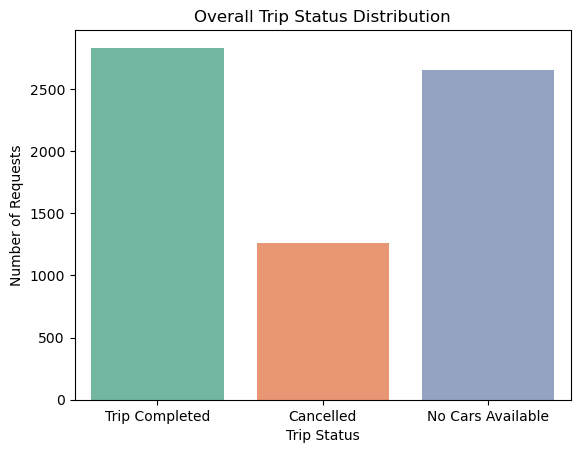

In [56]:
# Trip status distribution
sns.countplot(data=df, x='Status', hue='Status', palette='Set2', legend=False)
plt.title('Overall Trip Status Distribution')
plt.xlabel('Trip Status')
plt.ylabel('Number of Requests')
plt.show()


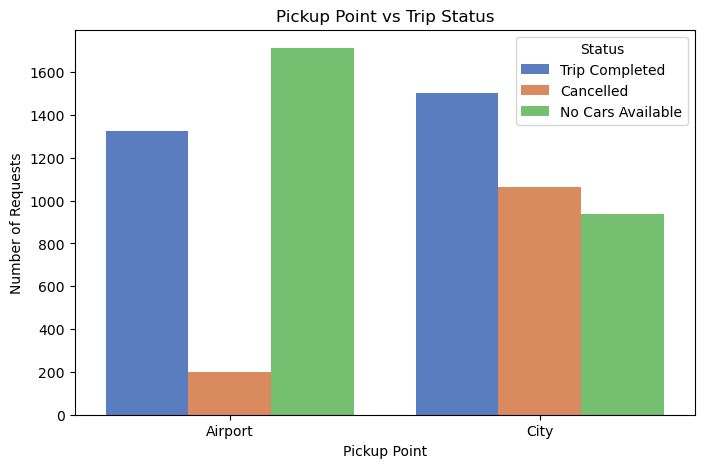

In [58]:
# Pickup point vs. trip status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='muted')
plt.title('Pickup Point vs Trip Status')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()


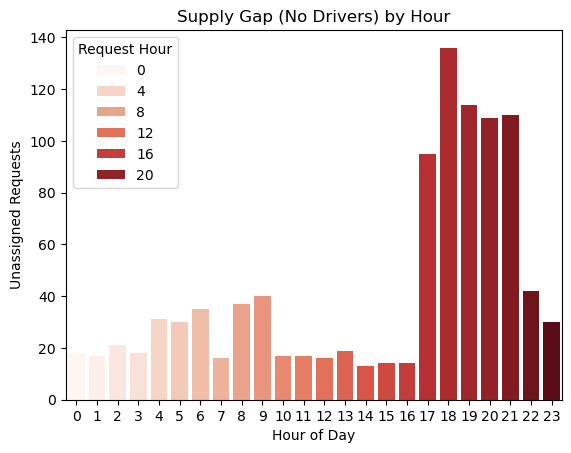

In [60]:
# Driver availabililty by hour
sns.countplot(data=df_viz[df_viz['Has Driver'] == False], x='Request Hour',hue='Request Hour', palette='Reds')
plt.title('Supply Gap (No Drivers) by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Unassigned Requests')
plt.show()


In [ ]:
# Trip Duration Distribution - Completed Trips
sns.histplot(data=df[df['Trip Duration'].notna()], x='Trip Duration', bins=30, kde=True)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.show()


KeyError: 'Trip Duration'

In [ ]:
# Trip Completion rate by hour
completion_rate = df_viz.groupby('Request Hour')['Trip Completed'].mean().reset_index()

sns.lineplot(data=completion_rate, x='Request Hour', y='Trip Completed', marker='o')
plt.title('Hourly Trip Completion Rate')
plt.xlabel('Hour of Day')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)
plt.show()


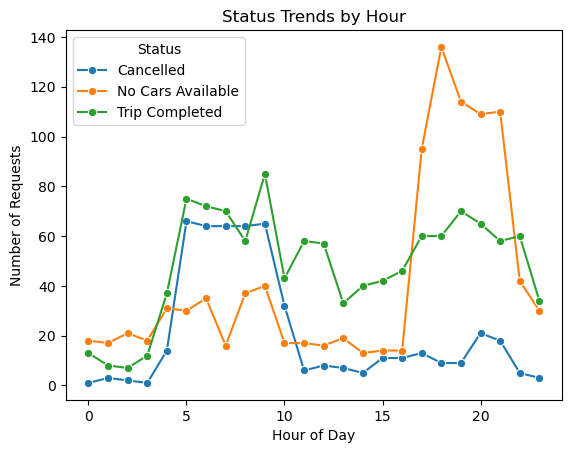

In [65]:
# status trends by hour
status_by_hour = df_viz.groupby(['Request Hour', 'Status']).size().reset_index(name='Count')

sns.lineplot(data=status_by_hour, x='Request Hour', y='Count', hue='Status', marker='o')
plt.title('Status Trends by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()


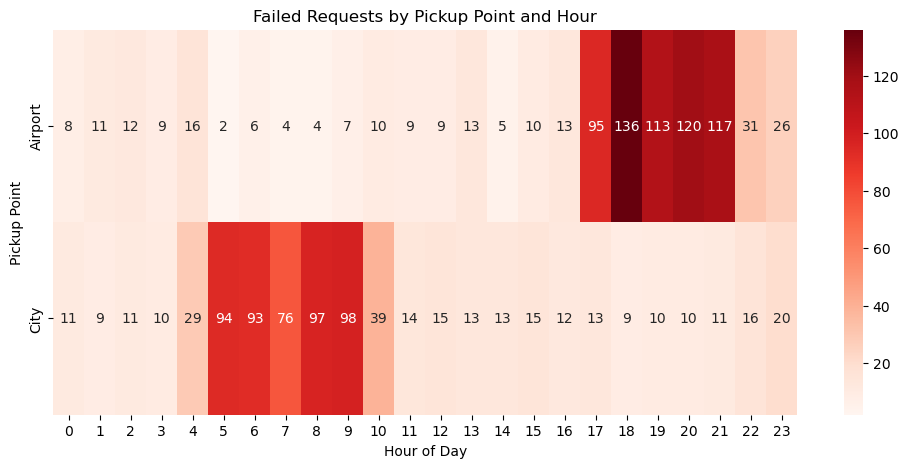

In [67]:
# Heatmap of failures by pickup point by hour
failures = df_viz[df_viz['Trip Completed'] == False]
heat_data = failures.groupby(['Pickup point', 'Request Hour']).size().unstack().fillna(0)
plt.figure(figsize=(12, 5))
sns.heatmap(heat_data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Failed Requests by Pickup Point and Hour')
plt.ylabel('Pickup Point')
plt.xlabel('Hour of Day')
plt.show()


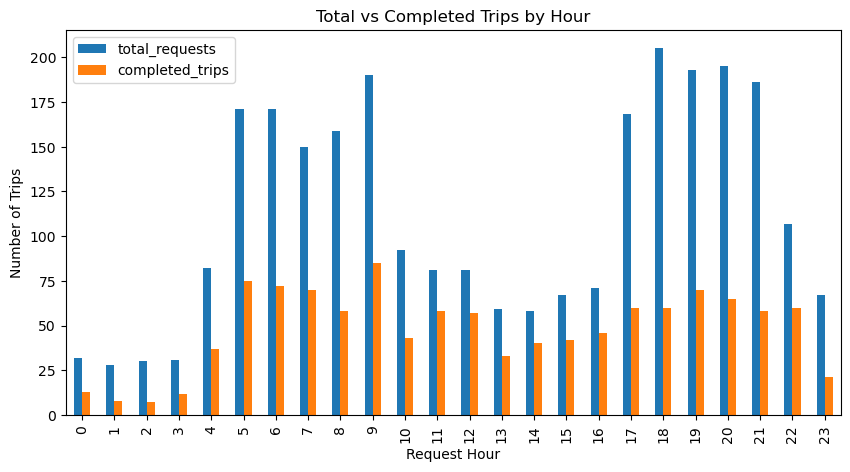

In [69]:
# Total Requests vs Completed Trips by Hour
summary = df_viz.groupby('Request Hour').agg(
    total_requests=('Request id', 'count'),
    completed_trips=('Trip Completed', 'sum')
).reset_index()

summary['completion_rate'] = summary['completed_trips'] / summary['total_requests']

summary.plot(
    x='Request Hour',
    y=['total_requests', 'completed_trips'],
    kind='bar',
    figsize=(10,5),
    title='Total vs Completed Trips by Hour'
)
plt.ylabel('Number of Trips')
plt.show()


#### Insights
- Most requests occur during 5–9 AM and 5–9 PM, indicating commuter peaks.
- Cancellation and No Cars issues are higher in these hours.
- Airport pickup points show more unfulfilled requests.
- Completion rate is lowest in early morning and late evening hours.
- Average Trip duration is about 50 minutes

#### Business Recommendations
- Increase driver availability during 5–9 AM and 5–9 PM.
- Strategically allocate more drivers to airport zones.
- Consider surge pricing or driver incentives during peak times.
- Use trip duration data to optimize route allocation.
